








#### Helpful sites
1) https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/ <br>
2) https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# 1. Imports

In [49]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# 2. Converting the tsv file to dataframe

In [2]:
df=pd.read_csv("mitofish.12S.Sep2021.tsv", sep='\t', header=0)

In [3]:
df[:50]


,Accession,Gene definition,taxid,Superkingdom,Phylum,Class,Order,Family,Genus,Species,Sequence,OrderID,FamilyID
0,AB006953,Carassius auratus langsdorfi mitochondrial DNA...,138676,Eukaryota,Chordata,Actinopteri,Cypriniformes,Cyprinidae,Carassius,Carassius langsdorfii,GATAACATCCCTATATGGTTTAGTACATAATATGCATAATATTACA...,32.0,109
1,AB015962,"Mustelus manazo mitochondrial DNA, complete se...",79736,Eukaryota,Chordata,Chondrichthyes,Carcharhiniformes,Triakidae,Mustelus,Mustelus manazo,GCTAGTGTAGCTTAATTTAAAGCATGGCACTGAAGATGCTAAGATG...,7.0,27
2,AB016274,"Sigmops gracilis mitochondrial genes, complete...",48457,Eukaryota,Chordata,Actinopteri,Stomiiformes,Gonostomatidae,Sigmops,Sigmops gracilis,GTTATCGTAGCTTACTTCTAAAGCCTAGCCCTGAAAATGCTAAGAT...,42.0,200
3,AB018224,Coryphaenoides armatus mitochondrial gene for ...,76798,Eukaryota,Chordata,Actinopteri,Gadiformes,Macrouridae,Coryphaenoides,Coryphaenoides armatus,CATAAAGGTTTGGTCCTGGCTTTACTATCAACTCTAACCTGATTTA...,51.0,243
4,AB018225,Coryphaenoides yaquinae mitochondrial gene for...,83387,Eukaryota,Chordata,Actinopteri,Gadiformes,Macrouridae,Coryphaenoides,Coryphaenoides yaquinae,CATAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTGATTTA...,51.0,243
5,AB018226,Coryphaenoides nasutus mitochondrial gene for ...,83388,Eukaryota,Chordata,Actinopteri,Gadiformes,Macrouridae,Coryphaenoides,Coryphaenoides nasutus,CACAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTAATTTA...,51.0,243
6,AB018227,Coryphaenoides longifilis mitochondrial gene f...,83389,Eukaryota,Chordata,Actinopteri,Gadiformes,Macrouridae,Coryphaenoides,Coryphaenoides longifilis,CACAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTAATTTA...,51.0,243
7,AB018228,Coryphaenoides acrolepis mitochondrial gene fo...,83390,Eukaryota,Chordata,Actinopteri,Gadiformes,Macrouridae,Coryphaenoides,Coryphaenoides acrolepis,CACAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTAATTTA...,51.0,243
8,AB018229,Coryphaenoides cinereus mitochondrial gene for...,83391,Eukaryota,Chordata,Actinopteri,Gadiformes,Macrouridae,Coryphaenoides,Coryphaenoides cinereus,CACAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTAATTTA...,51.0,243
9,AB018230,Coryphaenoides pectoralis mitochondrial gene f...,83392,Eukaryota,Chordata,Actinopteri,Gadiformes,Macrouridae,Albatrossia,Albatrossia pectoralis,CACAAAGGTTTGGTCCTAGCTTTACTATCAACTCTGACCTAATTTA...,51.0,243


# 3. Only Selecting the Sequence and Species from the Dataset

In [4]:
filter_df=df[['Family','Sequence']]

In [5]:
filter_df.head()

,Family,Sequence
0,Cyprinidae,GATAACATCCCTATATGGTTTAGTACATAATATGCATAATATTACA...
1,Triakidae,GCTAGTGTAGCTTAATTTAAAGCATGGCACTGAAGATGCTAAGATG...
2,Gonostomatidae,GTTATCGTAGCTTACTTCTAAAGCCTAGCCCTGAAAATGCTAAGAT...
3,Macrouridae,CATAAAGGTTTGGTCCTGGCTTTACTATCAACTCTAACCTGATTTA...
4,Macrouridae,CATAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTGATTTA...


### 3.1 Adding the Length of DNA sequence column to the Dataframe

In [6]:

filter_df['Sequence_length']= df['Sequence'].apply(lambda x: len(x))

In [7]:
filter_df.head()

,Family,Sequence,Sequence_length
0,Cyprinidae,GATAACATCCCTATATGGTTTAGTACATAATATGCATAATATTACA...,16578
1,Triakidae,GCTAGTGTAGCTTAATTTAAAGCATGGCACTGAAGATGCTAAGATG...,16707
2,Gonostomatidae,GTTATCGTAGCTTACTTCTAAAGCCTAGCCCTGAAAATGCTAAGAT...,16436
3,Macrouridae,CATAAAGGTTTGGTCCTGGCTTTACTATCAACTCTAACCTGATTTA...,826
4,Macrouridae,CATAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTGATTTA...,826


### 3.2 Checking the distribution of the DNA length

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015467FEF848>]],
      dtype=object)

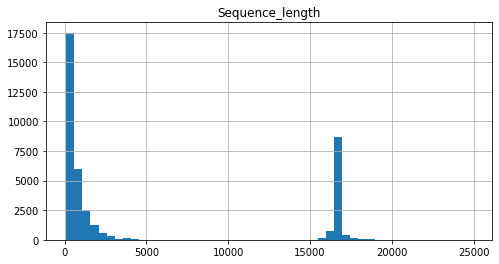

In [8]:
filter_df.hist(column="Sequence_length", figsize=(8,4), bins=50)

### 3.3 Total number of Family Classes

In [9]:
unique_classes = df['Family'].nunique()
print("The total number of samples are: ", len(filter_df))
print("The total number of unique classes are ", unique_classes)

The total number of samples are:  38699
The total number of unique classes are  541


In [10]:
filter_df['Family'].value_counts()

Gobiidae           2347
Clupeidae          1302
Cyprinidae         1284
Serranidae         1226
Labridae            922
                   ... 
Protanguillidae       1
Parabembridae         1
Tarumaniidae          1
Radiicephalidae       1
Parabrotulidae        1
Name: Family, Length: 541, dtype: int64

### 4) Translating DNA sequence into sequence of world


In [11]:
def getKmers(sequence, size=3):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [12]:

filter_df['words'] = filter_df.apply(lambda x: getKmers(x['Sequence']), axis=1)

In [13]:
filter_df.head()

,Family,Sequence,Sequence_length,words
0,Cyprinidae,GATAACATCCCTATATGGTTTAGTACATAATATGCATAATATTACA...,16578,"[gat, ata, taa, aac, aca, cat, atc, tcc, ccc, ..."
1,Triakidae,GCTAGTGTAGCTTAATTTAAAGCATGGCACTGAAGATGCTAAGATG...,16707,"[gct, cta, tag, agt, gtg, tgt, gta, tag, agc, ..."
2,Gonostomatidae,GTTATCGTAGCTTACTTCTAAAGCCTAGCCCTGAAAATGCTAAGAT...,16436,"[gtt, tta, tat, atc, tcg, cgt, gta, tag, agc, ..."
3,Macrouridae,CATAAAGGTTTGGTCCTGGCTTTACTATCAACTCTAACCTGATTTA...,826,"[cat, ata, taa, aaa, aag, agg, ggt, gtt, ttt, ..."
4,Macrouridae,CATAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTGATTTA...,826,"[cat, ata, taa, aaa, aag, agg, ggt, gtt, ttt, ..."


In [14]:
filter_df['sentence']=filter_df['words'].apply(lambda x: ' '.join(x))

In [15]:
filter_df.head()

,Family,Sequence,Sequence_length,words,sentence
0,Cyprinidae,GATAACATCCCTATATGGTTTAGTACATAATATGCATAATATTACA...,16578,"[gat, ata, taa, aac, aca, cat, atc, tcc, ccc, ...",gat ata taa aac aca cat atc tcc ccc cct cta ta...
1,Triakidae,GCTAGTGTAGCTTAATTTAAAGCATGGCACTGAAGATGCTAAGATG...,16707,"[gct, cta, tag, agt, gtg, tgt, gta, tag, agc, ...",gct cta tag agt gtg tgt gta tag agc gct ctt tt...
2,Gonostomatidae,GTTATCGTAGCTTACTTCTAAAGCCTAGCCCTGAAAATGCTAAGAT...,16436,"[gtt, tta, tat, atc, tcg, cgt, gta, tag, agc, ...",gtt tta tat atc tcg cgt gta tag agc gct ctt tt...
3,Macrouridae,CATAAAGGTTTGGTCCTGGCTTTACTATCAACTCTAACCTGATTTA...,826,"[cat, ata, taa, aaa, aag, agg, ggt, gtt, ttt, ...",cat ata taa aaa aag agg ggt gtt ttt ttg tgg gg...
4,Macrouridae,CATAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTGATTTA...,826,"[cat, ata, taa, aaa, aag, agg, ggt, gtt, ttt, ...",cat ata taa aaa aag agg ggt gtt ttt ttg tgg gg...


### 5) Convert a collection of text documents to a matrix of token counts.

In [16]:
corpus=list(filter_df['sentence'])

In [17]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(corpus)

### 5.1 Visualizing all our feature array

In [18]:
features=vectorizer.get_feature_names()
print(features)

['aaa', 'aac', 'aag', 'aah', 'aak', 'aam', 'aan', 'aar', 'aas', 'aat', 'aaw', 'aay', 'aca', 'acb', 'acc', 'acg', 'ack', 'acm', 'acn', 'acr', 'acs', 'act', 'acw', 'acy', 'aga', 'agc', 'agd', 'agg', 'agh', 'agk', 'agm', 'agn', 'agr', 'ags', 'agt', 'agv', 'agw', 'agy', 'aht', 'aka', 'akc', 'akg', 'akr', 'aks', 'akt', 'ama', 'amc', 'amg', 'amm', 'amr', 'ams', 'amt', 'amw', 'amy', 'ana', 'anc', 'ang', 'anm', 'ann', 'anr', 'ant', 'any', 'ara', 'arc', 'arg', 'arm', 'arr', 'ars', 'art', 'arw', 'ary', 'asa', 'asc', 'asg', 'asr', 'ast', 'asy', 'ata', 'atb', 'atc', 'atg', 'ath', 'atk', 'atm', 'atn', 'atr', 'ats', 'att', 'atw', 'aty', 'awa', 'awc', 'awg', 'awk', 'awm', 'aws', 'awt', 'aww', 'awy', 'aya', 'ayc', 'ayg', 'ayk', 'ayn', 'ayr', 'ays', 'ayt', 'ayw', 'ayy', 'bga', 'bta', 'btt', 'byt', 'caa', 'cac', 'cag', 'cak', 'cam', 'can', 'car', 'cas', 'cat', 'caw', 'cay', 'cbt', 'cca', 'ccc', 'ccg', 'cck', 'ccm', 'ccn', 'ccr', 'ccs', 'cct', 'ccv', 'ccw', 'ccy', 'cda', 'cga', 'cgc', 'cgg', 'cgk', 'cgm'

In [19]:
print("The length of the feature is: ", len(features))

The length of the feature is:  850


## First Technqiue
### 5.2 Mapping all our feature with the feature array
#### This technique invloves counting the number of times the feature was detected in our sequence data

In [20]:
sequence_vector=X.toarray()

### Printing a simple Feature map for the first sequence

In [21]:
print(sequence_vector[0])

[487 434 271   0   0   0   0   0   0 436   0   0 413   0 392 136   0   0
   0   0   0 374   0   0 220 304   0 228   0   0   0   0   0   0 201   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0 353   0 291 219   0   0   0   0   0   0 452   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0 441 351 217   0   0   0   0   0 314   0   0   0 399
 433 160   0   0   0   0   0 415   0   0   0   0 132 120  98   0   0   0
   0   0  83   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 450   0 254   0 198   0   0   0   0   0 315   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 283 201 179   0   0   0   0   0 175   0
   0   0 226 273   0  48   0   0   0   0   0 176   

In [22]:
len(sequence_vector[1])

850

## Second Technique
### 5.3 Creating a one-hot encoder for each and every feature array and mapping the DNA sequence with it

In [23]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(features)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


### 5.4 Creating a python dictionary for mapping the feature with its respective one hot encoder

In [24]:

feature_encoder_mapper = dict(zip(features, onehot_encoded))

### 5.5 Mapping dna sequence with its respective one hot encoder

In [25]:
def dna_mapper(sequence,mapper):
    encoded_dna=[]
    for feature in sequence:
        encoded_dna.append(mapper[feature])
    return encoded_dna

In [26]:
#selecting the first dna sequence for test purpose
seq=filter_df.words[1]

In [27]:
len(seq)

16705

In [28]:
encoded_seq=dna_mapper(seq,feature_encoder_mapper)

In [30]:
len(sequence_vector)

38699

In [89]:
data=sequence_vector[:10000]
data=data.tolist()

In [90]:
for i in range(0,10000):
    data[i].insert(0,i)

## Using Self-Organizing Map to group data based on common similarities

In [93]:
from sklearn.preprocessing import MinMaxScaler
# Plotting our SOM
from pylab import bone,pcolor,colorbar,plot,show
from minisom import MiniSom
import matplotlib.pyplot as plt

## Data Normalization

In [94]:
sc=MinMaxScaler(feature_range=(0,1))
scaled_final_arr=sc.fit_transform(data)

## Setting the training Parameters

In [161]:
#we are going to make 10 by 10 gird as we don't have lot of data in our dataset
# input_length is going to be number of column
# learning rate= 0.5 which is deafult
#sigma= 1 which is deafult and radius
#Doing all of these will help to identity pattern

som=MiniSom(x=10, y=10, input_len=851, sigma=1.0, learning_rate=0.5)

#initialising our weight
#Its better to be close to zero
#random_wights will help to initialize random weight
som.random_weights_init(scaled_final_arr)

#number of interation to train our som
#100 is the nubmer of iteration we are going to be using which is enoguh
som.train_random(data=scaled_final_arr,num_iteration=100)

## Plotting the map

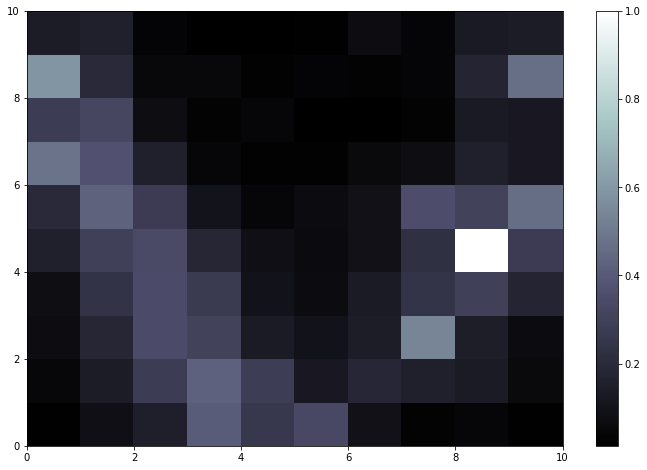

In [162]:
plt.figure(figsize=(12,8))
bone()
pcolor(som.distance_map().T)
colorbar()
show()

In [179]:
mappings=som.win_map(scaled_final_arr)
mapper_index=mappings[(4,9)]

In [180]:
inv_mapper_index=sc.inverse_transform(mapper_index)

In [181]:
index=[]
for i in inv_mapper_index:
    ind=int(round(i[0]))
    index.append(ind)

In [182]:
print(index)

[30, 31, 33, 121, 122, 123, 124, 125, 126, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298]


In [183]:
for i in index:
    print(filter_df['Family'][i])

Gobiidae
Gobiidae
Gobiidae
Odontobutidae
Odontobutidae
Odontobutidae
Odontobutidae
Odontobutidae
Odontobutidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
Gobiidae
